# Netflix Original Films & IMDB Scores - EDA


In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import pylab
from random import choice
from pylab import legend,plot,show,title,xlabel,ylabel
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm, t
from matplotlib import pyplot as plt
from collections import Counter
from numpy import random
import os 

This dataset consists of all Netflix original films released as of June 1st, 2021.
Additionally, it also includes all Netflix documentaries and specials. 
The data was web scraped off of this Wikipedia page, which was then integrated with a dataset consisting of all of their corresponding IMDB scores. 
IMDB scores are voted on by community members, and the majority of the films have 1,000+ reviews.

 Load the dataset and display its structure

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
os.getcwd()

'C:\\Users\\HP'

In [4]:
os.chdir(r'D:\DBDA\RStudio And Stats')

In [5]:
df = pd.read_csv("NetflixOriginals.csv",encoding='latin1') 
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


 Checking columns non null counts and datatype 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


 Checking the column names in this dataset

In [7]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

 Checking the number of rows and columns 


In [8]:
ind = df.shape
print("Rows:",ind[0])
print("Columns:",ind[1])

Rows: 584
Columns: 6


 Checking for null values in this dataset

In [9]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

 Checking Duplicates in Dataset

In [10]:
np.where(df.duplicated() == True)

(array([], dtype=int64),)

 Since Premiere column was not in proper datetime format we replace it with datetime yyyy-mm-dd

In [11]:
df['Premiere'] = df['Premiere'].str.replace('.', ',')

In [12]:
print(df)

                                                 Title  \
0                                      Enter the Anime   
1                                          Dark Forces   
2                                              The App   
3                                       The Open House   
4                                          Kaali Khuhi   
5                                                Drive   
6                                    Leyla Everlasting   
7                      The Last Days of American Crime   
8                                              Paradox   
9                                   Sardar Ka Grandson   
10                                Searching for Sheela   
11                                            The Call   
12                                             Whipped   
13                                  All Because of You   
14                                               Mercy   
15                                      After the Raid   
16            

In [13]:
df['Premiere'] = pd.to_datetime(df['Premiere']) 
#df['Month'] = df['Premiere'].dt.month

In [14]:
#df = df.drop(['Month'],axis=1)

In [15]:
#In which language were the long-running films created according to the dataset? Make visualizations.

In [16]:
lang =df[['Language','Runtime']].sort_values(by='Runtime',ascending=False)

In [17]:
lang.head(5)

,Language,Runtime
561,English,209
328,English,155
581,English,153
247,English,151
284,Japanese,151


In [18]:
top_lang_df = lang.head(50)

<BarContainer object of 50 artists>

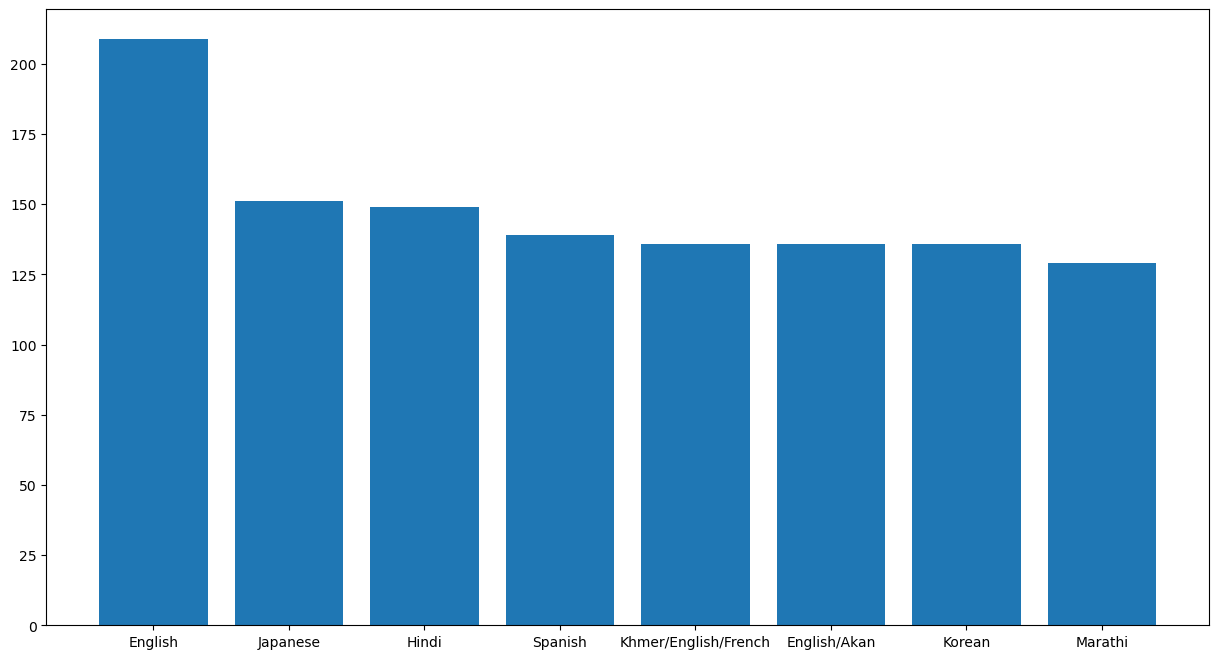

In [19]:
plt.figure(figsize=(15, 8))
plt.bar(top_lang_df['Language'], top_lang_df['Runtime'])

English appears to be the language with the longest-running films in the dataset.
This suggests that English-language films may often include extended narratives, detailed storytelling, or large-scale productions, which lead to longer runtimes.

The other prominent languages include:
- Japanese
- Hindi
- Spanish
  
Japanese and Hindi films rank closely behind English films.This could be due to cultural storytelling traditions, such as detailed character arcs, inclusion of songs (especially in Hindi cinema), and slower narrative pacing.

The dataset includes films in a variety of languages such as Spanish, Khmer/English/French, and English/Akan, showcasing the diversity of long-running films across different cultures and regions.

In [20]:
# Visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.

In [21]:
gen1 = df.iloc[np.where(df['Genre'] == 'Documentary')]
gen2 = gen1[gen1['Premiere'].between('2019-01-01','2020-06-30')]
gen2.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English
151,One Take,Documentary,2020-06-18,85,5.7,Thai
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish


<Axes: xlabel='Genre', ylabel='IMDB Score'>

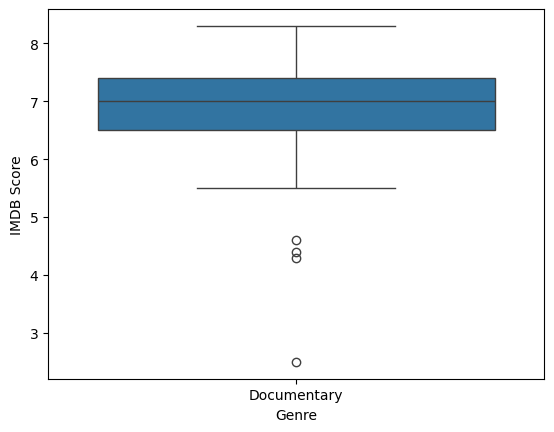

In [22]:
sns.boxplot(x=gen2['Genre'],y=gen2['IMDB Score'])

The median IMDB score for documentaries lies around 7.0 indicating that most documentaries during this period received moderate to good reviews.

The IMDB scores are distributed between 5.5 and 8.2, with a strong clustering of values around 6.5 to 7.5.

There are a few lower outliers below 5.0, with the lowest IMDB score near 2.5. These could represent poorly received documentaries, perhaps due to weak narratives, lack of interest, or poor execution.

The whiskers extend from approximately 5.5 to 8.2, showing the overall spread of scores.

<h3>Key Takeaways</h3>

- Most documentaries received favorable ratings.
- A small number of documentaries received scores below 5.0, indicating poor performance.
- A significant portion of scores fall between 6.5 and 7.5, reflecting consistency in quality.

In [23]:
# Which genre has the highest IMDB rating among movies shot in English?

In [24]:
eng = df.iloc[np.where(df['Language'] == 'English')]
eng.head(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
8,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
14,Mercy,Thriller,2016-11-22,90,4.2,English


In [25]:
m = eng.groupby('Genre')['IMDB Score'].mean()
print(m)
m.idxmax()

Genre
Action                                  6.200000
Action comedy                           5.725000
Action thriller                         6.400000
Action-thriller                         5.700000
Action/Comedy                           5.400000
Action/Science fiction                  5.400000
Adventure                               6.300000
Adventure-romance                       6.100000
Adventure/Comedy                        5.500000
Aftershow / Interview                   6.750000
Animated musical comedy                 6.700000
Animation                               6.560000
Animation / Comedy                      7.000000
Animation / Musicial                    6.400000
Animation / Science Fiction             7.500000
Animation / Short                       7.125000
Animation/Christmas/Comedy/Adventure    8.200000
Animation/Comedy/Adventure              6.400000
Animation/Musical/Adventure             6.400000
Animation/Superhero                     4.900000
Anime / Short 

'Animation/Christmas/Comedy/Adventure'

In [26]:
sort = m.sort_values(ascending=False)
sort = sort.head(10)

<Axes: xlabel='Genre'>

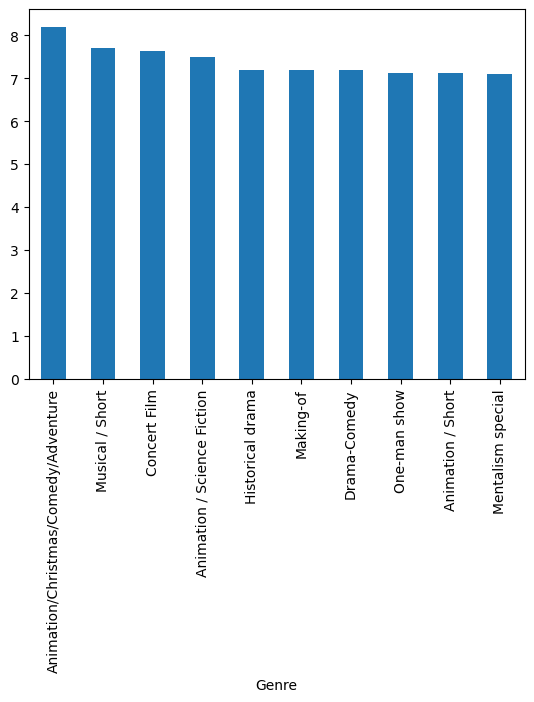

In [27]:
sort.plot(kind = 'bar')

- The genre "Animation/Christmas/Comedy/Adventure" has the highest IMDB rating among the English-shot movies.
- The prominence of "Animation/Christmas/Comedy/Adventure" indicates its universal appeal and high entertainment value, making it the top choice.
- The clustering of ratings around the 7-8 range reflects that English movies in these genres tend to maintain strong standards, possibly due to good storytelling, production quality, or cultural resonance.

In [28]:
# What is the average 'runtime' of movies shot in 'Hindi'?

In [29]:
hin = df.iloc[np.where(df['Language']=='Hindi')]
hin['Runtime'].mean()

115.78787878787878

Hindi movies have avg runtime of 115.78 

In [30]:
# How many categories does the Genre Column have and what are they? Visualize it.

In [7]:
df['Genre'].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

C:\Users\HP\AppData\Local\Temp\ipykernel_15864\1967901616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Genre'],palette='Paired')


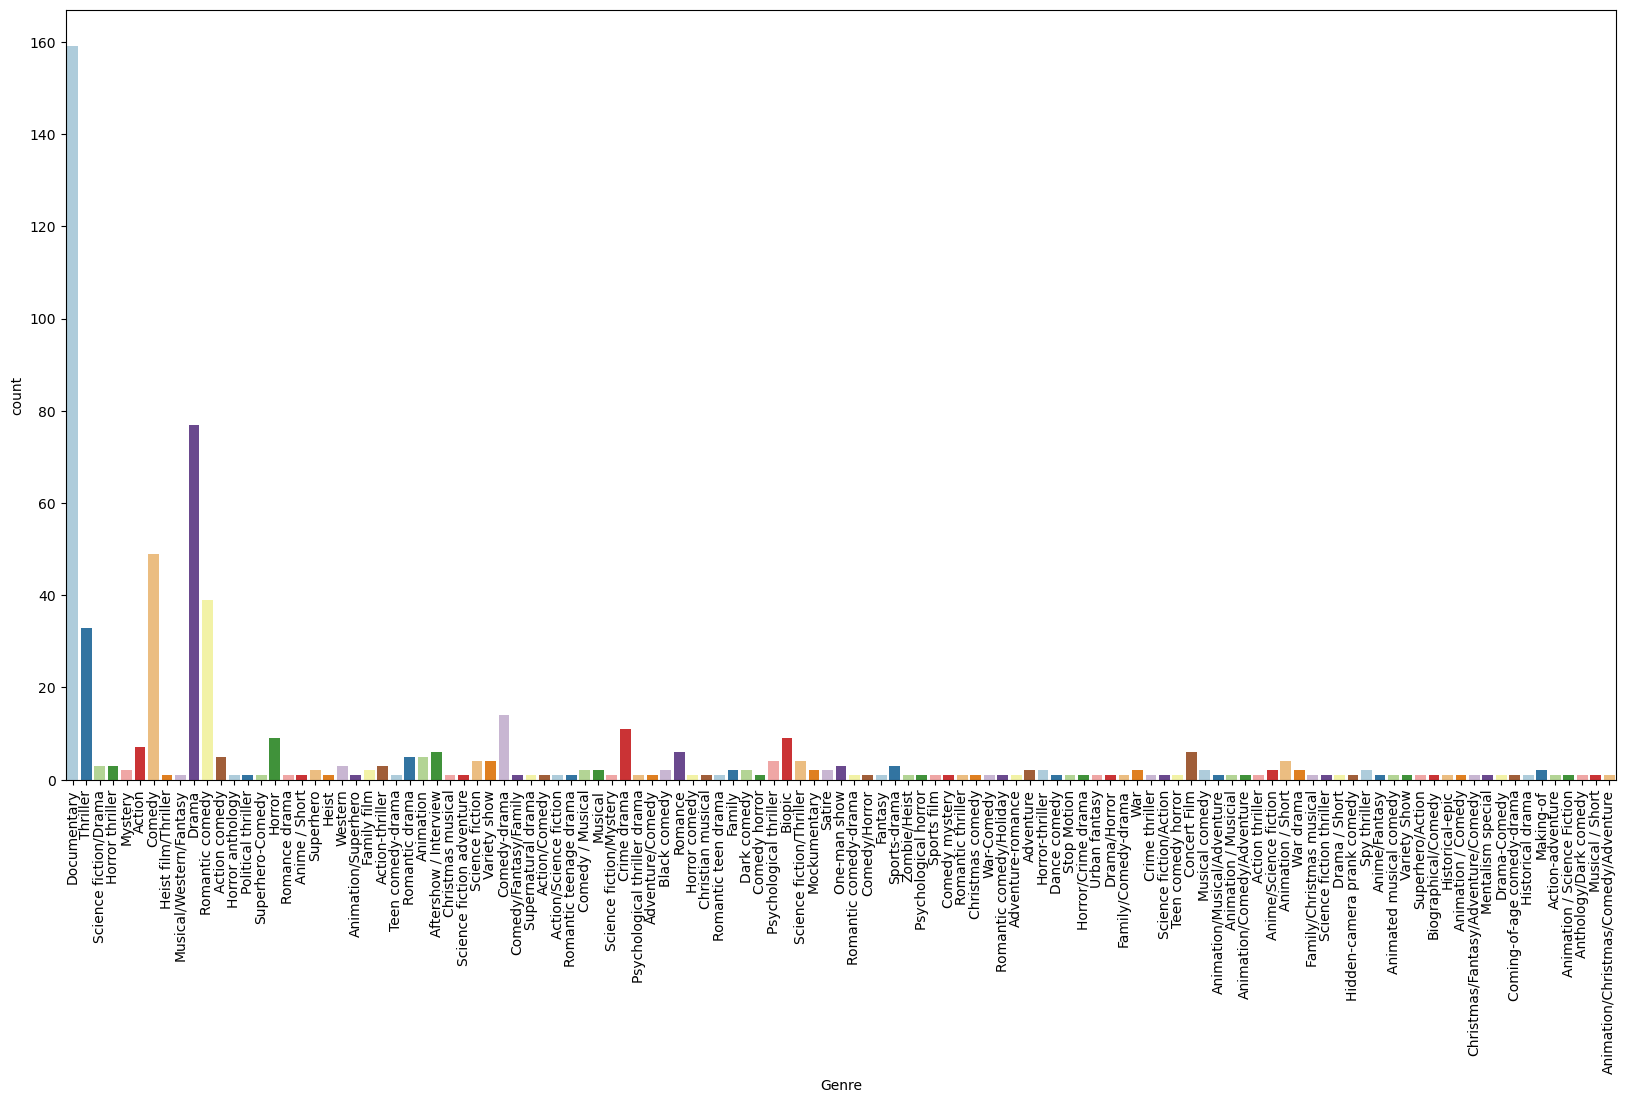

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Genre'],palette='Paired')
plt.xticks(rotation=90)
plt.show()

The "Genre" column in the dataset contains 115 unique categories. These represent a diverse range of genres such as "Documentary," "Thriller," "Comedy," "Romantic drama," "Action/Comedy," and many more, including hybrid and niche genres like "Animation/Christmas/Comedy/Adventure" and "Horror anthology."

In [33]:
# Find the 3 most used languages in the movies in the data set.

In [34]:
l = df['Language'].value_counts().head(3)
l = pd.DataFrame(l)
l

,count
Language,
English,401
Hindi,33
Spanish,31


C:\Users\HP\AppData\Local\Temp\ipykernel_15864\3136220234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language',y='count',data=l,palette='pink')


<Axes: xlabel='Language', ylabel='count'>

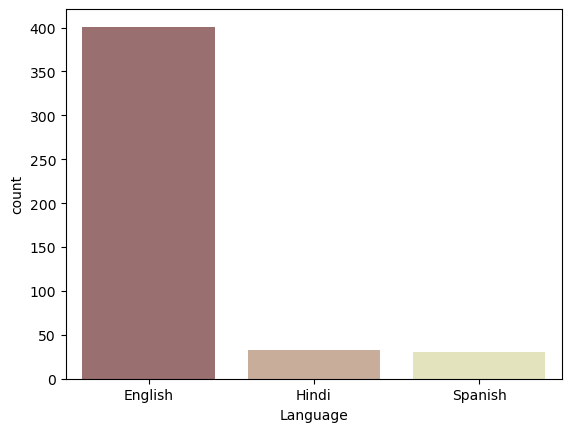

In [35]:
sns.barplot(x='Language',y='count',data=l,palette='pink')

Netflix's focus on English content demonstrates its global ambitions, while the inclusion of regional languages like Hindi and Spanish underscores its efforts to localize and cater to specific markets. These language preferences align with trends in the streaming industry, where diversity in content is becoming a key strategy for growth.

In [36]:
# Top 10 Movies With IMDB Ratings

In [37]:
r = df[['Title','IMDB Score']].sort_values(by='IMDB Score',ascending=False).head(10)
r

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


C:\Users\HP\AppData\Local\Temp\ipykernel_15864\1892961550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title',y='IMDB Score',data=r,palette='vlag')


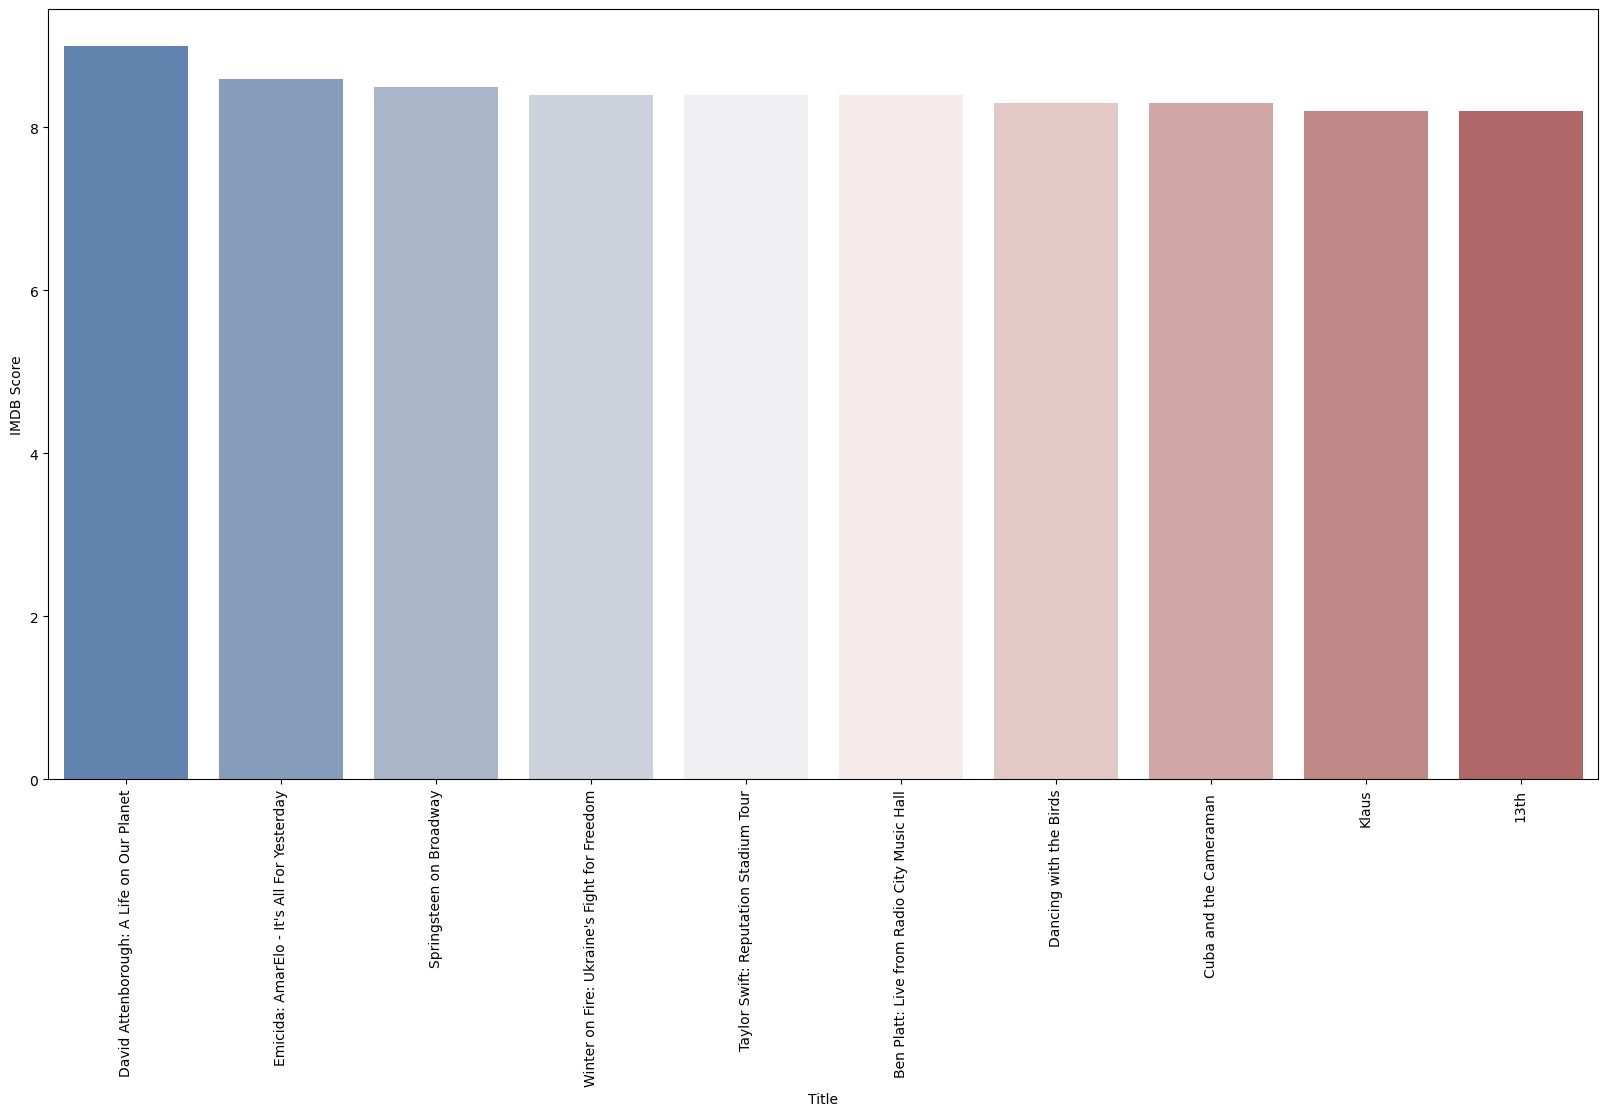

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x='Title',y='IMDB Score',data=r,palette='vlag')
plt.xticks(rotation = 90)
plt.show()

- The movie "David Attenborough: A Life on Our Planet" has the highest IMDb score among the 10 movies. This indicates its strong appeal, likely due to its environmental themes and David Attenborough’s prominence as a narrator.
- Movies like "13th", focusing on systemic racism, and "Cuba and the Cameraman", exploring Cuba's history, suggest that audiences value content with meaningful cultural and political narratives.
- Leverage Popular Genres: Filmmakers could focus on creating high-quality documentaries or celebrity-driven content, as these genres are clearly appreciated.
- Audience Engagement: Streaming platforms could promote these movies by curating thematic collections, such as "Critically Acclaimed Documentaries" or "Top Performances by Artists", to drive viewership.


In [39]:
# What is the correlation between IMDB score and 'Runtime'? Examine and visualize.

In [40]:
c = df[['IMDB Score','Runtime']]
c.corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


<Axes: >

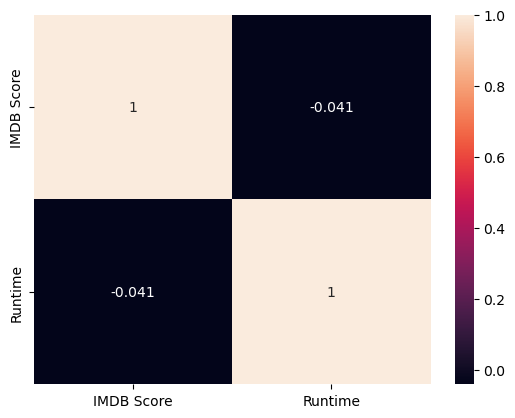

In [41]:
sns.heatmap(c.corr(),annot=True)

 Runtime does not significantly impact IMDb scores. A longer or shorter movie runtime doesn't guarantee a higher or lower rating.
  

In [42]:
# Top 10 Genre by IMDB Score

In [43]:
g = df.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False).head(10)

In [44]:
g

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Historical drama                        7.200000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
Name: IMDB Score, dtype: float64

<Axes: xlabel='Genre'>

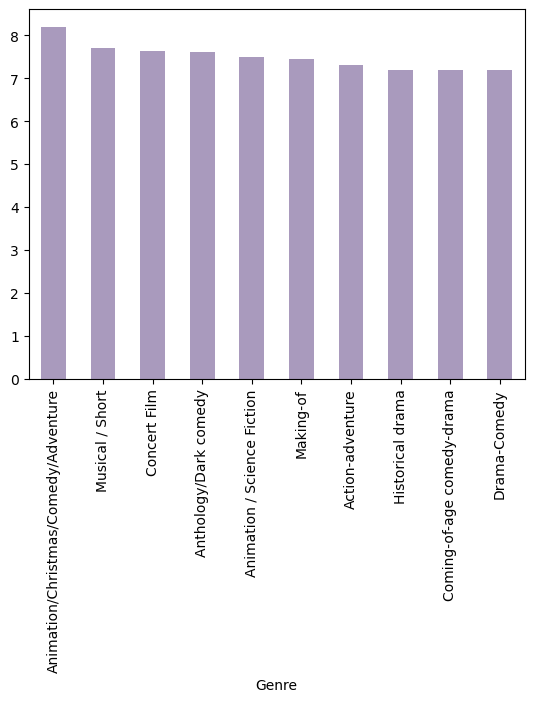

In [45]:
g.plot(kind='bar',color='#A99ABD')

- The highest-rated genre appears to be Animation/Christmas/Comedy/Adventure. Its mix of light-hearted entertainment and broad appeal may make it a top choice for diverse audiences.
- Musical/Short, Concert Films, and Anthology/Dark Comedy also score highly, highlighting a preference for creative and niche storytelling formats.
- Animation/Science Fiction continues the trend of animated content being highly rated, likely due to its broad appeal to different age groups.
- Invest in genres like Concert Films or Making-of documentaries to cater to viewers looking for unique storytelling experiences.

In [46]:
# What are the top 10 movies with the highest 'runtime'? Visualize it.

In [47]:
r = df[['Title','Runtime']].sort_values(by='Runtime',ascending=False).head(10)
r

,Title,Runtime
561,The Irishman,209
328,Da 5 Bloods,155
581,Springsteen on Broadway,153
247,Citation,151
284,The Forest of Love,151
509,Raat Akeli Hai,149
7,The Last Days of American Crime,149
543,Ludo,149
194,Army of the Dead,148
5,Drive,147


C:\Users\HP\AppData\Local\Temp\ipykernel_15864\3242930694.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title',y='Runtime',data=r,palette='vlag')


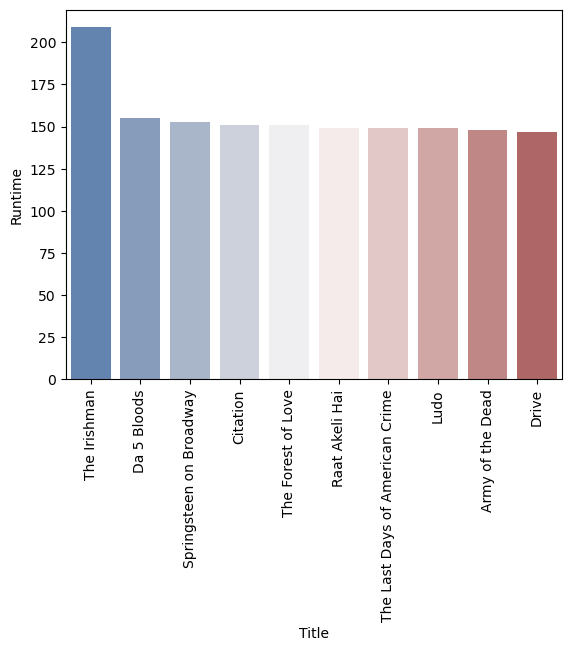

In [48]:
sns.barplot(x='Title',y='Runtime',data=r,palette='vlag')
plt.xticks(rotation=90)
plt.show()

- The Irishman has the longest runtime among the listed movies.
- The movies appear to have a wide range of runtimes, from approximately 150 minutes to over 200 minutes.

In [49]:
# In which year were the most movies released? Visualize it.

In [50]:
df['Year'] = df['Premiere'].dt.year

In [51]:
year = df['Year'].value_counts()
year

Year
2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

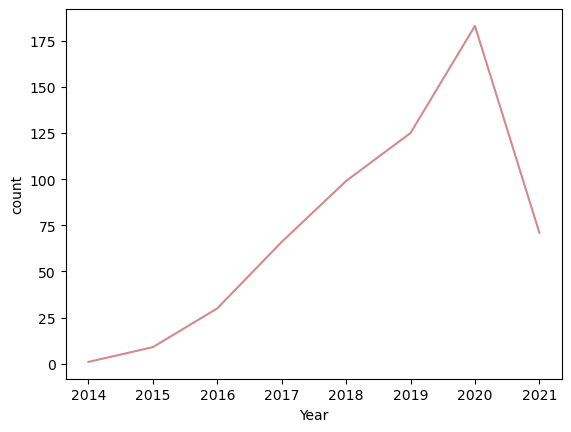

In [52]:
sns.lineplot(year,color='#D28A8C')

The number of movies released over the years 2014 to 2021.

Key Observations:

- Overall Trend: There is a general upward trend in movie releases from 2014 to 2020.
- Peak Year: The year with the most movie releases appears to be 2020, with the count reaching around 180.
- 2020: The sharp peak in 2020 suggests a significant increase in movie production that year.
- 2021: There is a steep decline in 2021, indicating a decrease in movie releases compared to the previous year.

In [53]:
# Which language movies have the lowest average IMDB rating? Visualize it.

In [63]:
m1 = df.groupby(df['Language'])['IMDB Score'].mean()
m2 = m.sort_values(ascending=True)
m2 = pd.DataFrame(m2)
print(m2)

                            IMDB Score
Language                              
Malay                         4.200000
English/Japanese              4.400000
Norwegian                     5.100000
Filipino                      5.100000
Polish                        5.166667
Thai                          5.450000
Swedish                       5.500000
Italian                       5.542857
Spanish/Basque                5.600000
German                        5.640000
Turkish                       5.660000
French                        5.770000
Dutch                         5.800000
Indonesian                    5.844444
Korean                        5.916667
Hindi                         5.981818
Marathi                       6.066667
Portuguese                    6.216667
English/Spanish               6.220000
Spanish                       6.303226
English                       6.380050
Japanese                      6.400000
Spanish/Catalan               6.400000
English/Taiwanese/Mandari

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1000 with 0 Axes>

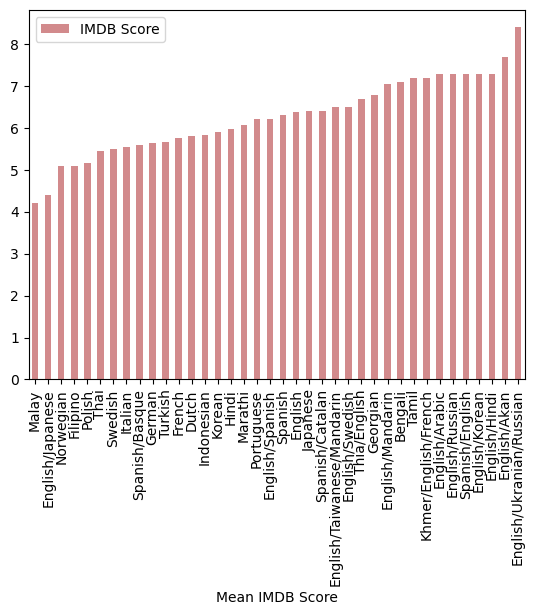

In [64]:
plt.figure(figsize=(20,10))
m2.plot(kind = 'bar' , color='#D28A8C' )
plt.xticks(rotation=90)
plt.xlabel("Mean IMDB Score")
plt.show()

- Malay movies seem to have the lowest average IMDB rating among the languages shown.
- Overall Trend: There is a general upward trend in the average IMDB ratings as we move from left to right on the chart.
- Top Languages: Languages like English/Ukrainian/Russian, English/Korean, English/Hindi, and English/Akan appear to have the highest average IMDB ratings among the languages shown.

In [ ]:
# Which year has the greatest total runtime?

In [65]:
df['Year'] = df['Premiere'].dt.year

In [68]:
g1 = df.groupby(df['Year'])['Runtime'].sum()
g1

Year
2014       81
2015      814
2016     2766
2017     6129
2018     9405
2019    10856
2020    17384
2021     7214
Name: Runtime, dtype: int64

In [74]:
g1 = pd.DataFrame(g1)
g1.sort_values(ascending=False,by='Runtime').head(1)

,Runtime
Year,
2020,17384


In the year 2020 the runtime total overall runtime was 17384 which shows that in this year the movie runtime was excellent

In [ ]:
# What is the "Genre" where each language is used the most?

In [80]:
l = df.groupby(['Language','Genre']).size().reset_index(name='Count')
l

,Language,Genre,Count
0,Bengali,Documentary,1
1,Dutch,Crime drama,1
2,Dutch,Fantasy,1
3,Dutch,Romantic comedy,1
4,English,Action,4
5,English,Action comedy,4
6,English,Action thriller,1
7,English,Action-thriller,2
8,English,Action/Comedy,1
9,English,Action/Science fiction,1


In [83]:
l1 = l.loc[l.groupby('Language')['Count'].idxmax()]
l1

,Language,Genre,Count
0,Bengali,Documentary,1
1,Dutch,Crime drama,1
44,English,Documentary,120
105,English/Akan,War drama,1
106,English/Arabic,Documentary,1
107,English/Hindi,Documentary,2
108,English/Japanese,Crime drama,1
110,English/Korean,Action-adventure,1
111,English/Mandarin,Documentary,2
112,English/Russian,Documentary,1


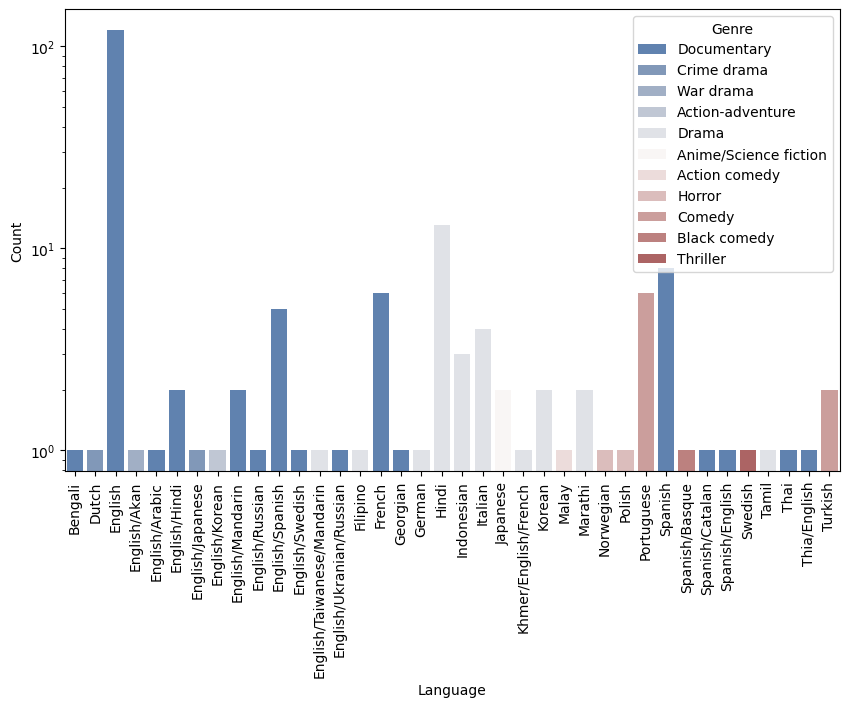

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x=l1['Language'],y=l1['Count'],hue=l1['Genre'],palette='vlag')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

- Drama is a Dominant Genre: Across multiple languages, "Drama" appears to be the most frequently used genre. This suggests that stories with dramatic themes are popular and widely produced in various film industries.
- Language Diversity: The chart showcases a wide range of languages represented in the film industry, highlighting the global nature of cinema.
- Genre Variation: While "Drama" is prevalent, there is also diversity in genres across languages. "Comedy" is prominent in some languages, indicating that humor is a significant element in film production.


# Conclusion :

The analysis of Netflix original movies provides valuable insights into key factors influencing their success. Understanding audience preferences in terms of genres, languages, runtime, and IMDB scores. This data-driven approach contributes to customer satisfaction, retention, and the potential for attracting new subscribers.